# Mission : It's Your Turn!


## 1. 본문에서 언급된 Feature 를 제외하고 유의미한 Feature를 1개 이상 찾아봅시다.

- Hint: Fare? Sibsp? Parch?



In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [5]:
df = pd.read_csv('titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


- age, sex, Pclas 정보는 살펴보았고,
- Name, Cabin, Ticket으로는 생존율과의 관련성을 살펴보기 어려운 변수라 
- Embarked, 탑승한 항구에 대한 정보를 살펴보고자 합니다.

In [7]:
df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

- 'Embarked'는 탑승자가 타이타닉호에 탑승한 항구 기록을 담은 범주형 변수입니다.
- C는 영국해협 인근의 프랑스 쉘부르, Q는 맨체스터 인근의 퀸즈타운, S는 영국 남해안의 사우스햄튼입니다.


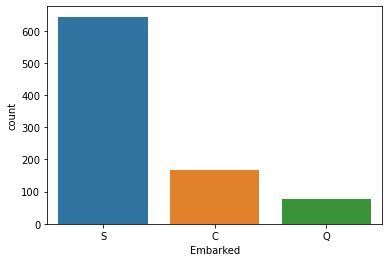

In [9]:
sns.countplot(x='Embarked', data = df)
plt.show()

- 골고루 분산되어 있는 것이 아니라 'S' 항구에서 집중 적으로 탑승했고, 'C'항구, 'Q'항구에서는 상대적으로 덜 탑승한 것을 알 수 있습니다.
- 탑승 항구 별로 생존/ 비생존자의 비율이 다르게 나타날까요?

In [11]:
df[['Embarked','Survived']].groupby(['Embarked']).mean()

,Survived
Embarked,
C,0.553571
Q,0.389610
S,0.336957


- 'C' 항구에서 탑승한사람 중에서는 0.5가 넘어서 사망자 보다 생존자가 더 많았던 반면에,
- 가장 많은 사람이 탑승했던 'S' 항구에서는 안타깝게도 사망자의 비율이 더 높았던 것으로 확인됩니다.

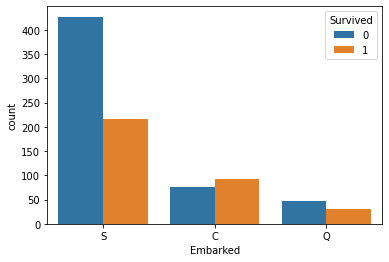

In [14]:
sns.countplot(x = 'Embarked', hue = 'Survived', data = df)
plt.show()

- 왜 특정 항구에서 탑승한 사람들의 사망률이 더 높을까요? 모두가 탑승하고 있다가 동시에 침몰사고를 당했는데 말이죠.
  혹시 각 항구에 탑승한 사람들 사이에 경제적 차이가 있었던 것은 아닐까요? 우리는 이미 비싼 1등석 탑승자들이 생존율이 높았던 것을 알고 있습니다.

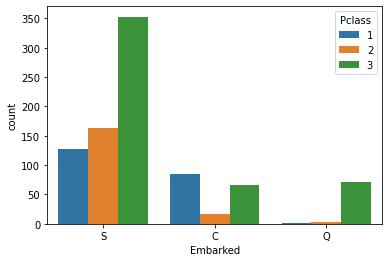

In [16]:
sns.countplot(x = 'Embarked', hue = 'Pclass', data = df)
plt.show()

- 역시나 'S'항구 탑승자들 사이에서는 3등석 구매자들이 월등히 높고,
- 'C'항구 탑승자들 중에는 '1등석' 탑승자가 50%는 되어 보이는 군요.
- 3등석 구매자가 많았던 'S'항구 탑승자들 중에 사망자가 더 많고, 1등석 탑승자가 많았던 'C'항구 탑승자들은 더 많이 생존한 거 아닐까요?

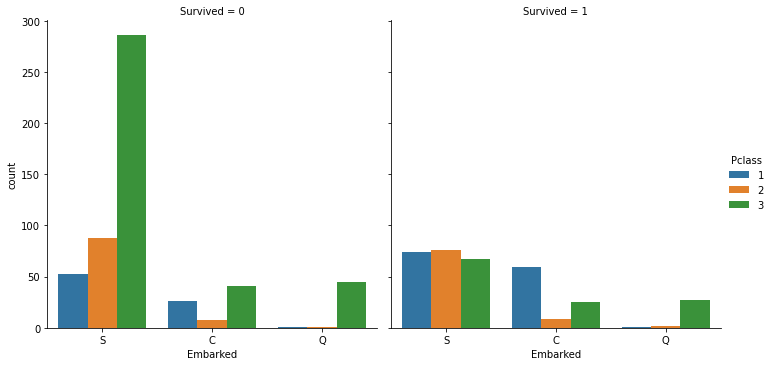

In [18]:
sns.catplot(x='Embarked', col = 'Survived', hue = 'Pclass' , kind = 'count', data=df)
plt.show()

- 사망자와 생존자를 나눠서 살펴보았더니, 역시 사망자 쪽에서 3등석 탑승자의 수가 더 많고, 생존자들은 상대적으로 '1등석 탑승자'의 비율이 높은 것 같습니다.
- 가장 사망률이 높았던 'S'항구의 생존자들을 살펴보면, 1등석과 2,3등석의 비율이 거의 같은 반면, 사망자들 중에는 3등석의 비율이 월등히 높은 것으로 보입니다.
- EDA로 한 눈에 보았을 때는 항구 별 몇등석 탑승자이냐의 비율이 다르기 때문에 이렇게 탑승 항구별로 생존율의 차이가 난 것 같군요. 물론 몇등석에 탑승했는지의 영향을 배제하고도 어떤 항구에서 탑승했냐가 생존율의 차이에 영향을 미쳤는지는 보다 깊이있는 분석을 해야 알 수 있겠지만요.

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


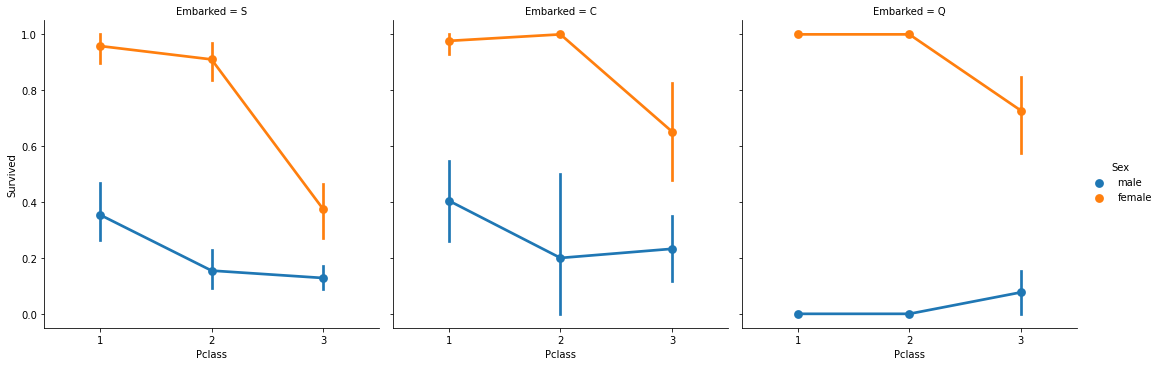

In [26]:
sns.catplot('Pclass','Survived',hue='Sex',col='Embarked',data=df, kind ='point')
plt.show()

- 항구별로 나누어 클래스별 생존율을 살펴보았습니다. 이번엔 성별 차이까지 함께 봅니다.
- 전체적으로 3등석의 생존율이 떨어지는 흐름이 보이고, 특히 여성들의 경우 1등석과 3등석 탑승자의 생존율 차이가 커 보이는군요.
- 항구별로는 전체적인 그림의 형태가 차이나지는 않아 보입니다. 단, 기울기의 차이는 보이는데, S항구 탑승자의 경우 3등석 여성의 생존율이 더 급격히 떨어지네요.  
- 그리고 Q항구의 남성만이 유일하게 3등석일 때 생존율이 미세하게 올라가네요.

In [38]:
df.groupby(['Embarked', 'Pclass']).count()['Survived']

Embarked  Pclass
C         1          85
          2          17
          3          66
Q         1           2
          2           3
          3          72
S         1         127
          2         164
          3         353
Name: Survived, dtype: int64

- Q항구의 탑승자의 경우 1등석은 2명, 2등석은 3명밖에 되지 않는군요. 표본이 너무 작아서 이렇게 보일 수도 있을 것 같네요.